In [1]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml(name = "mnist_784", version=1)

c:\Users\USER\Documents\Programming\AI.ML\DIGIT CLASSIFIER NEW\digit-classifier\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline

In [3]:
data, target = mnist_data['data'], mnist_data['target']

In [19]:
array_data = np.array(data)
width = 28
height = 28

In [49]:
def reshape_array(array):
    reshaped_array = array.reshape(width, height)
    return(reshaped_array)


## DATA AUGUMENTATION/PREPROCESSING/

In [59]:
def shift_down(array_image, pixel_to_shift):
    array_image = array_image.reshape(width, height)
    shifted_image = np.zeros_like(array_image)
    shifted_image[pixel_to_shift:, :] = array_image[:-pixel_to_shift, :]
    return shifted_image
    
def shift_up(array_image , pixel_to_shift):
    array_image = array_image.reshape(width, height)
    shifted_image = np.zeros_like(array_image)
    shifted_image[:-pixel_to_shift, :] = array_image[pixel_to_shift: , :]
    return shifted_image
    
def shift_left(array_image, pixel_to_shift):
    array_image = array_image.reshape(width, height)
    shifted_image = np.zeros_like(array_image)
    shifted_image[:, :-pixel_to_shift] = array_image[:, pixel_to_shift:]
    return shifted_image
def shift_right(array_image, pixel_to_shift):
    array_image = array_image.reshape(width, height)
    shifted_image = np.zeros_like(array_image)
    shifted_image[:, pixel_to_shift:] = array_image[:, :-pixel_to_shift]
    return shifted_image



In [60]:
some_image = reshape_array(array_data[0])
down_image = shift_down(some_image,10)
up_image = shift_up(some_image, 10)
left_image = shift_left(some_image, 10)
right_image = shift_right(some_image, 10)


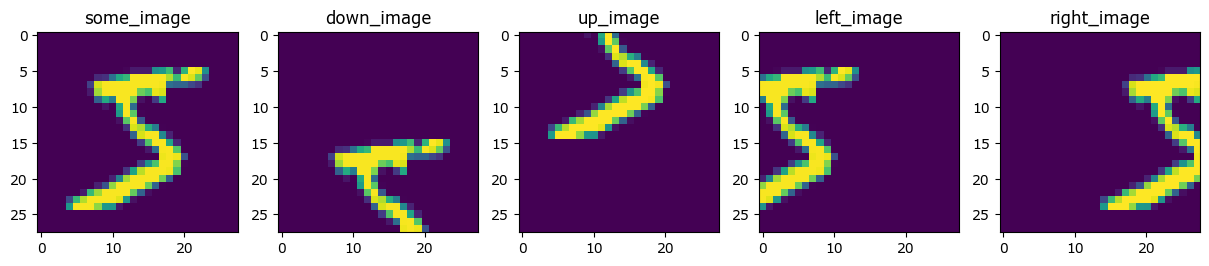

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(15,4))
required_image = [some_image,down_image, up_image,left_image,right_image,]
names = ['some_image','down_image', 'up_image','left_image','right_image',]
for i in range(5):
    axes[i].imshow(required_image[i])
    axes[i].set_title(names[i])
    




In [66]:
expanded_data = array_data.copy()
array_data.shape

(70000, 784)

In [78]:
shifted_images = []
shifted_labels = []
for i in range(len(expanded_data)):

    reshaped_array = reshape_array(expanded_data[i])
    shifted_images.append(reshaped_array)
    shifted_labels.append(target[i])
    down_image = shift_down(reshaped_array,1)
    up_image = shift_up(reshaped_array, 1)
    left_image = shift_left(reshaped_array, 1)
    right_image = shift_right(reshaped_array, 1)

    shifted_images.extend([down_image, up_image, left_image,right_image])
    shifted_labels.extend([target[i]]*4)



        

In [79]:
shifted_images = np.array(shifted_images)
shift_labels = np.array(shifted_labels)

In [80]:
shifted_images.shape

(350000, 28, 28)

In [81]:
shift_labels.shape

(350000,)

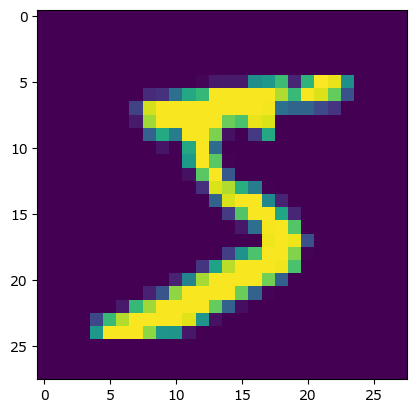

In [74]:
plt.imshow(shifted_images[0])

## SPLITTING OF DATA

In [93]:
x_train, x_test, y_train, y_test = train_test_split(shifted_images.reshape(shifted_images.shape[0], -1), shifted_labels,test_size=0.2 ,random_state= 42)

In [94]:
x_train.shape

(280000, 784)

## TRAINING DATA SET

SCALING DATA

In [87]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

choose model, fit it, use it to predict others, check how it worked

In [95]:

models = [('rfc', RandomForestClassifier()), ('knn',KNeighborsClassifier()),]


In [96]:

scaler = StandardScaler()
scaler.fit_transform(x_train)
for model in models:
    accuracy = cross_val_score(model[1], x_train, y_train,  cv = 3, scoring = "accuracy")
    print(f"{model[0]} accuracy: {accuracy}")

rfc accuracy: [0.9737609  0.97381419 0.9732999 ]


## TRY DIFFERNT PARAMETERS WITH GRID SEARCH AND CHOOSE BEST

In [ ]:
params_grid = {}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=params_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

### TEST DATA

In [ ]:
final_model = grid_search.best_estimator_
prediction = final_model.predict(x_test)
accuracy = np.sum(prediction==y_test)/len(prediction)
print(accuracy)